In [455]:
!git clone https://github.com/mborowik/regresja.git


fatal: destination path 'regresja' already exists and is not an empty directory.


# Import pakietów

In [456]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_squared_error

# Import danych 

In [457]:
# wgranie zbioru danych .csv
df=pd.read_csv('/content/regresja/laptop_price.csv',encoding = "ISO-8859-1")

# Wstępne zapoznanie się ze zbiorem danych

In [458]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [460]:
df.describe()

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


#Funkcje niestandardowe poprawiające czytelność wykresu

In [461]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

In [462]:
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x=col_x, y = col_y, data=df, color='#0d98ba', line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc=leg, ncol=1, fontsize=15, fancybox=True, shadow=True, frameon=True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

# Podział danych na numeryczne i kategorialne

In [463]:
categorical_feature = [feature for feature in df.columns if df[feature].dtypes =="O"]
print(len(categorical_feature))
categorical_feature

10


['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight']

In [464]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(len(numerical_feature))
numerical_feature

3


['laptop_ID', 'Inches', 'Price_euros']

# Operacja na danych

## Sprawdzenie danych unikalnych

In [465]:
for i in categorical_feature:
  print(f'#### {i} ####')
  print(df[i].unique())

#### Company ####
['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
#### Product ####
['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7RG' 'X541UA-DM1897 (i3-6006U/4

## czyszczenie danych

In [466]:
df = df.rename(columns=str.lower)
df.columns


Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price_euros'],
      dtype='object')

In [467]:
df = df.rename(columns={'price_euros':'price'})
df.columns


Index(['laptop_id', 'company', 'product', 'typename', 'inches',
       'screenresolution', 'cpu', 'ram', 'memory', 'gpu', 'opsys', 'weight',
       'price'],
      dtype='object')

## Sprawdzenie czy wystepuja duplikaty
W zbiorze nie ma duplikatów danych

In [468]:
df[df.duplicated()]

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price


## Usuwanie niepotrzebnych kolumn
kolumna laptop_id wydaje się być zbędna. df.info() zwraca ilośc wiekszy 1303 co by się zgadzało z indeksem natomiast laptop_id wskazuje 1320 pozycji.
Usuwamy tą kolumnę


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_id         1303 non-null   int64  
 1   company           1303 non-null   object 
 2   product           1303 non-null   object 
 3   typename          1303 non-null   object 
 4   inches            1303 non-null   float64
 5   screenresolution  1303 non-null   object 
 6   cpu               1303 non-null   object 
 7   ram               1303 non-null   object 
 8   memory            1303 non-null   object 
 9   gpu               1303 non-null   object 
 10  opsys             1303 non-null   object 
 11  weight            1303 non-null   object 
 12  price             1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [470]:
df['laptop_id']

0          1
1          2
2          3
3          4
4          5
        ... 
1298    1316
1299    1317
1300    1318
1301    1319
1302    1320
Name: laptop_id, Length: 1303, dtype: int64

In [471]:
df=df.drop('laptop_id', axis=1) 


In [472]:
df.head(5)

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [473]:
df['cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: cpu, Length: 1303, dtype: object

# Odseparowywanie danych w celu uzyskania nowych wartości


## cpu_freq



In [474]:
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df['cpu_freq'] = df['cpu_freq'].str.replace('GHz', '')

In [475]:
df.rename(columns={'cpu_freq': 'cpu_freq(GHz)'}, inplace=True)

In [476]:
df['cpu_freq(GHz)'] = df['cpu_freq(GHz)'].astype(float)

In [477]:
df['cpu']= df['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex=True) # wykasowanie częstotliwości z kolumny cpu

In [478]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1


## ram

In [479]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1


In [480]:
df['ram']

0        8GB
1        8GB
2        8GB
3       16GB
4        8GB
        ... 
1298     4GB
1299    16GB
1300     2GB
1301     6GB
1302     4GB
Name: ram, Length: 1303, dtype: object

In [481]:
df['ram'] = df['ram'].str.replace('GB', '')
df.rename(columns={'ram': 'ram(GB)'}, inplace=True)
df['ram(GB)'] = df['ram(GB)'].astype(int)

In [482]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,weight,price,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1


## weight

In [483]:
df['weight'].str.contains('kg').sum() # sprawdzenie czy wszystkie wagi są podane w kilogramach. Zgadza się.

1303

In [484]:
df['weight'] = df['weight'].str.replace('kg','').astype(float)

In [485]:
df.rename(columns={'weight': 'weight(kg)'}, inplace=True)

In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram(GB)           1303 non-null   int64  
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight(kg)        1303 non-null   float64
 11  price             1303 non-null   float64
 12  cpu_freq(GHz)     1303 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 132.5+ KB


In [487]:

df.head()

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,weight(kg),price,cpu_freq(GHz)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1


## cpu
Najbardziej populatne sa laptopy z procesorem Intela. Jest również kilka AMD oraz jeden samsung.

In [488]:
df['cpu_brand'] = df['cpu'].str.extract(r'^(\w+)')

In [489]:
df['cpu_brand'].value_counts()

Intel      1240
AMD          62
Samsung       1
Name: cpu_brand, dtype: int64

In [490]:
df[df['cpu_brand']=='Samsung'] # sprawdzenie co to jest za laptop, narazie zostawiamy tego laptopa.

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,weight(kg),price,cpu_freq(GHz),cpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2.0,Samsung


In [491]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,weight(kg),price,cpu_freq(GHz),cpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel


## memory

In [492]:
df['memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: memory, Length: 1303, dtype: object

In [493]:
df['memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

## gpu
Najwięcej Laptopów Intel, klejny Nvidia, AMD, AMR do sprawdzenia

In [494]:
df['gpu_brand'] = df['gpu'].str.extract(r'^(\w+)')
df['gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: gpu_brand, dtype: int64

In [495]:
df[df['gpu_brand']=='ARM'] # to jest ten  jeden laptop samsung.

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,weight(kg),price,cpu_freq(GHz),cpu_brand,gpu_brand
1191,Samsung,Chromebook Plus,2 in 1 Convertible,12.3,IPS Panel Touchscreen 2400x1600,Samsung Cortex A72&A53,4,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,659.0,2.0,Samsung,ARM


In [496]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   product           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram(GB)           1303 non-null   int64  
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight(kg)        1303 non-null   float64
 11  price             1303 non-null   float64
 12  cpu_freq(GHz)     1303 non-null   float64
 13  cpu_brand         1303 non-null   object 
 14  gpu_brand         1303 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 152.8+ KB


# Mapowanie danych


In [497]:
df.head()

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,weight(kg),price,cpu_freq(GHz),cpu_brand,gpu_brand
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Intel
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Intel
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Intel
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,AMD
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Intel


In [498]:
df['typename'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [499]:
for col in df.select_dtypes('object').columns:
    df[col+'_id'] = df[col].map({x:i for i,x in enumerate(list(df[col].unique()))})

In [500]:
df.head(20)

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,...,company_id,product_id,typename_id,screenresolution_id,cpu_id,memory_id,gpu_id,opsys_id,cpu_brand_id,gpu_brand_id
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1,0,1,0,1,1,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,...,1,2,1,2,1,2,2,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,...,0,0,0,3,2,3,3,0,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,2,4,0,0,0
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420,4,500GB HDD,AMD Radeon R5,Windows 10,...,2,3,1,4,3,4,5,2,1,1
6,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,...,0,0,0,3,2,5,6,3,0,0
7,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,256GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1,0,1,0,5,1,0,0,0
8,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U,16,512GB SSD,Nvidia GeForce MX150,Windows 10,...,3,4,0,2,4,3,7,2,0,2
9,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U,8,256GB SSD,Intel UHD Graphics 620,Windows 10,...,2,5,0,5,5,2,8,2,0,0


In [501]:
df.to_csv('laptop2.csv', index=False) # zapisuję dane do nowego pliku aby można było go dalej obrabiać

# Eksploracja danych - EDA

In [502]:
df1=pd.read_csv('laptop2.csv')
df1.head()

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,...,company_id,product_id,typename_id,screenresolution_id,cpu_id,memory_id,gpu_id,opsys_id,cpu_brand_id,gpu_brand_id
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1,0,1,0,1,1,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,...,1,2,1,2,1,2,2,1,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,...,0,0,0,3,2,3,3,0,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,2,4,0,0,0


In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1303 non-null   object 
 1   product              1303 non-null   object 
 2   typename             1303 non-null   object 
 3   inches               1303 non-null   float64
 4   screenresolution     1303 non-null   object 
 5   cpu                  1303 non-null   object 
 6   ram(GB)              1303 non-null   int64  
 7   memory               1303 non-null   object 
 8   gpu                  1303 non-null   object 
 9   opsys                1303 non-null   object 
 10  weight(kg)           1303 non-null   float64
 11  price                1303 non-null   float64
 12  cpu_freq(GHz)        1303 non-null   float64
 13  cpu_brand            1303 non-null   object 
 14  gpu_brand            1303 non-null   object 
 15  company_id           1303 non-null   i

In [504]:
df_clean=df1.copy() # kopia df do dalszej pracy aby niczego nie nadpisać.

## Liczba laptopów według marek

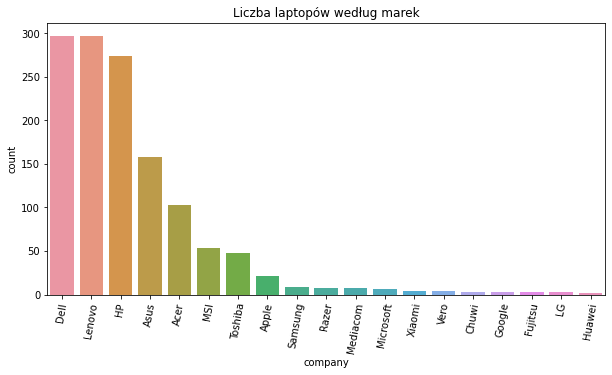

In [505]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='company', data=df, order = df['company'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)
plt.title('Liczba laptopów według marek')
plt.show()

Najwięcej laptopów jest marki Dell, Lenovo oraz HP

## Liczba laptopów według typu

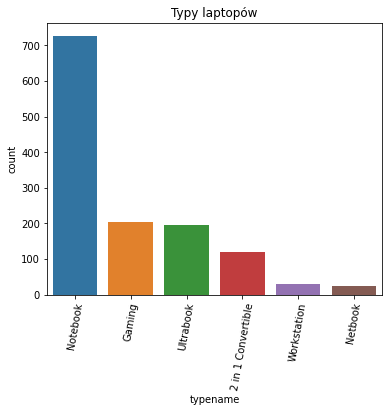

In [506]:
fig, ax  = plt.subplots(figsize=(6,5))
ax=sns.countplot(x='typename', data=df, order = df['typename'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80);
plt.title('Typy laptopów')
plt.show()

Najwięcej jest zwłykłych notebooków, później dopiero laptopy Gamingowe i reszta.

## Liczba laptopów według procesora

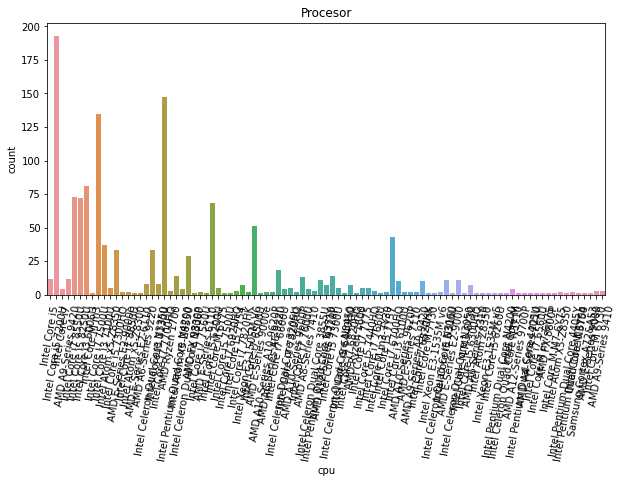

In [507]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='cpu', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

plt.title('Procesor')
plt.show()

In [508]:
cpu_list = df['cpu'].value_counts().index[:15].tolist()

In [509]:
cpu_list # 15 najczęściej wystepujących procesorów

['Intel Core i5 7200U ',
 'Intel Core i7 7700HQ ',
 'Intel Core i7 7500U ',
 'Intel Core i3 6006U ',
 'Intel Core i7 8550U ',
 'Intel Core i5 8250U ',
 'Intel Core i5 6200U ',
 'Intel Core i7 6500U ',
 'Intel Core i7 6700HQ ',
 'Intel Core i3 7100U ',
 'Intel Core i5 7300HQ ',
 'Intel Celeron Dual Core N3350 ',
 'Intel Celeron Dual Core N3060 ',
 'Intel Core i7 6600U ',
 'Intel Core i5 7300U ']

## Liczba laptopów według rozmiar ekranu

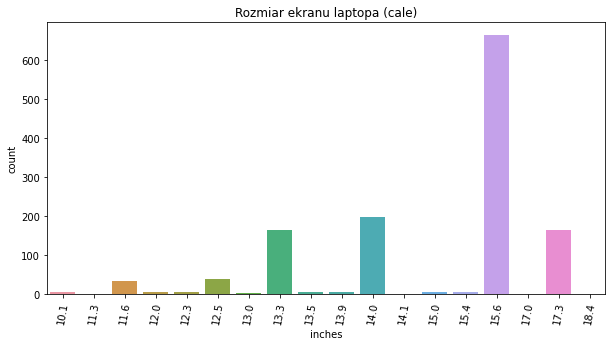

In [510]:
fig, ax  = plt.subplots(figsize=(10,5))
ax=sns.countplot(x='inches', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

plt.title('Rozmiar ekranu laptopa (cale)')
plt.show()

Jest stosunkowo mało laptopów z niestandardowymi rozmiarami ekranów, dlatego do dalszych analiz zostawimy tylko te najbardziej popularne.

In [511]:
inches_list = df['inches'].value_counts().index[:6].tolist()

In [512]:
inches_list

[15.6, 14.0, 13.3, 17.3, 12.5, 11.6]

Zostawiamy tylko 6 najbardziej popularnych rozmiarów ekranów

In [513]:
df_clean = df_clean[df_clean['inches'].isin(inches_list)]

In [514]:
df_clean

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,...,company_id,product_id,typename_id,screenresolution_id,cpu_id,memory_id,gpu_id,opsys_id,cpu_brand_id,gpu_brand_id
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1,0,1,0,1,1,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,...,1,2,1,2,1,2,2,1,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,2,4,0,0,0
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420,4,500GB HDD,AMD Radeon R5,Windows 10,...,2,3,1,4,3,4,5,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U,4,128GB SSD,Intel HD Graphics 520,Windows 10,...,5,615,4,7,34,0,9,2,0,0
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U,16,512GB SSD,Intel HD Graphics 520,Windows 10,...,5,404,4,30,34,3,9,2,0,0
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050,2,64GB Flash Storage,Intel HD Graphics,Windows 10,...,5,342,1,4,68,10,20,2,0,0
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U,6,1TB HDD,AMD Radeon R5 M330,Windows 10,...,1,616,1,4,34,6,101,2,0,1


## rozkład wagi laptopów

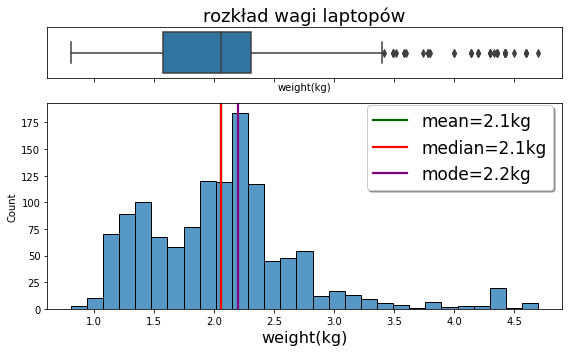

In [515]:
num_plot(df_clean, 'weight(kg)', 'rozkład wagi laptopów','kg')

## rozkład wagi laptopów

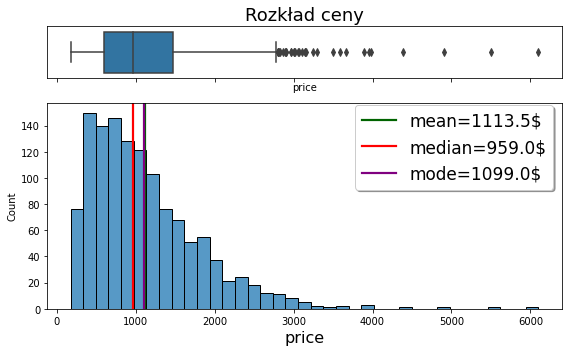

In [516]:
num_plot(df_clean, 'price', 'Rozkład ceny','$')

Istnieją laptopy których cena jest większa niż 4000 euro

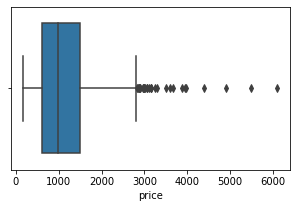

In [517]:
fig, ax  = plt.subplots(figsize=(5,3))
ax=sns.boxplot(x='price', data=df)

In [518]:
df[df['price']>4000] # są to laptopy do gier z dużą ilością pamięci ram oraz dużym monitorem.

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,...,company_id,product_id,typename_id,screenresolution_id,cpu_id,memory_id,gpu_id,opsys_id,cpu_brand_id,gpu_brand_id
196,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,...,13,120,3,16,32,18,45,2,0,2
610,Lenovo,Thinkpad P51,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Xeon E3-1535M v6,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,...,5,241,1,19,64,18,61,2,0,2
749,HP,Zbook 17,Workstation,17.3,IPS Panel Full HD 1920x1080,Intel Xeon E3-1535M v5,16,256GB SSD,Nvidia Quadro M2000M,Windows 7,...,1,399,5,5,73,2,81,8,0,2
830,Razer,Blade Pro,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,...,13,120,3,16,32,3,45,2,0,2


## rozkład pamięci ram

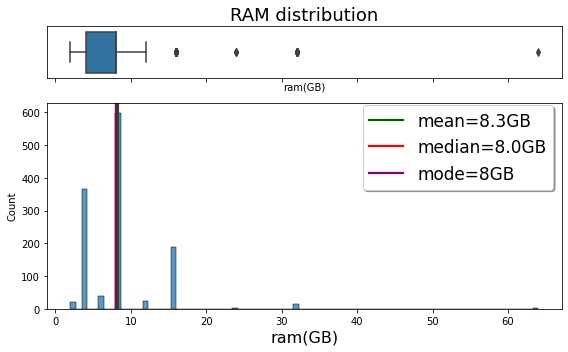

In [519]:
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

In [520]:
df[df['ram(GB)']>40] # jeden laptop posiada aż 64 GB ramu.

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,...,company_id,product_id,typename_id,screenresolution_id,cpu_id,memory_id,gpu_id,opsys_id,cpu_brand_id,gpu_brand_id
1066,Asus,ROG G701VO,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK,64,1TB SSD,Nvidia GeForce GTX 980,Windows 10,...,3,528,3,5,62,18,100,2,0,2


# Macierz korelacji

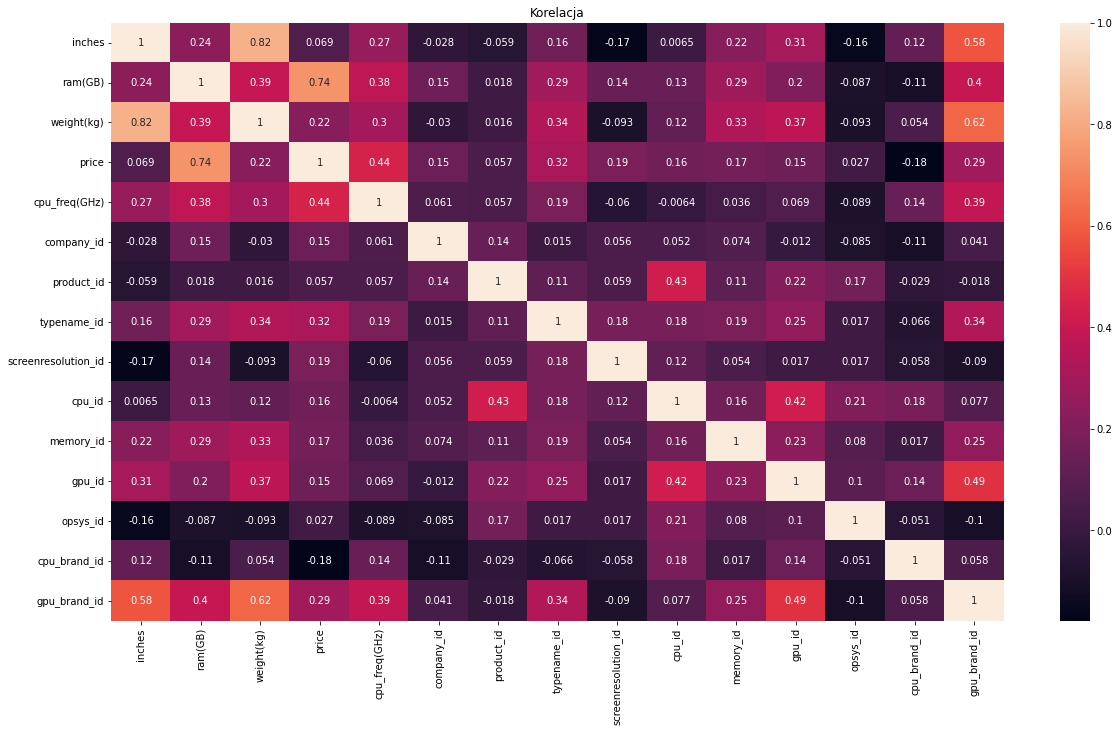

In [545]:
plt.figure(figsize=(20,11))
sns.heatmap(df_clean.corr(), annot=True)
plt.title('Korelacja')
plt.show()

Wnioski z macierzy korelacji:

Pamięć RAM ma wysoką dodatnią korelację z ceną (+0,74): Im więcej ramu w komputerze tym jest droższy.
Częstotliwość procesora ma dodatnią korelację z ceną (+0,44).
Rozmiar ekranu i waga mają wysoką dodatnią korelację (+0,82), laptopy z większymi ekranami są zwykle cięższe.

# Przygotowanie danych do modelowania

In [522]:
df1=df_clean.copy()

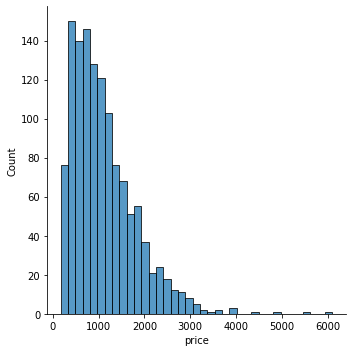

In [523]:
sns.displot(df1['price'])

In [524]:
df1.head()

,company,product,typename,inches,screenresolution,cpu,ram(GB),memory,gpu,opsys,...,company_id,product_id,typename_id,screenresolution_id,cpu_id,memory_id,gpu_id,opsys_id,cpu_brand_id,gpu_brand_id
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,...,0,0,0,0,0,0,0,0,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,...,0,1,0,1,0,1,1,0,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,...,1,2,1,2,1,2,2,1,0,0
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,...,0,0,0,0,0,2,4,0,0,0
5,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420,4,500GB HDD,AMD Radeon R5,Windows 10,...,2,3,1,4,3,4,5,2,1,1


In [564]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 1302
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1262 non-null   object 
 1   product              1262 non-null   object 
 2   typename             1262 non-null   object 
 3   inches               1262 non-null   float64
 4   screenresolution     1262 non-null   object 
 5   cpu                  1262 non-null   object 
 6   ram(GB)              1262 non-null   int64  
 7   memory               1262 non-null   object 
 8   gpu                  1262 non-null   object 
 9   opsys                1262 non-null   object 
 10  weight(kg)           1262 non-null   float64
 11  price                1262 non-null   float64
 12  cpu_freq(GHz)        1262 non-null   float64
 13  cpu_brand            1262 non-null   object 
 14  gpu_brand            1262 non-null   object 
 15  company_id           1262 non-null   i

In [574]:
numerical_feature = [feature for feature in df1.columns if df1[feature].dtypes != 'O']

numerical_feature




['inches',
 'ram(GB)',
 'weight(kg)',
 'price',
 'cpu_freq(GHz)',
 'company_id',
 'product_id',
 'typename_id',
 'screenresolution_id',
 'cpu_id',
 'memory_id',
 'gpu_id',
 'opsys_id',
 'cpu_brand_id',
 'gpu_brand_id']

In [583]:
X=df1[['inches', 'ram(GB)', 'weight(kg)','cpu_freq(GHz)','company_id', 'product_id', 'typename_id', 'screenresolution_id', 'cpu_id', 'memory_id', 'gpu_id',
 'opsys_id', 'cpu_brand_id', 'gpu_brand_id']]

In [584]:
y=df1['price'].values

In [671]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 777) #222

In [672]:
print(X_train.shape, X_test.shape)

(883, 14) (379, 14)


In [673]:
model_lin1=LinearRegression()
model_lin1.fit(X_train, y_train)

LinearRegression()

In [674]:
y_pred_test=model_lin1.predict(X_test)

In [676]:
r2_score(y_test, y_pred_test)


0.6428821789026373

dla wszystkich parametrów  - 
r2_score = 0.5723608748880697
mean_squared_error = 187576.2478455552

In [656]:
mean_squared_error(y_test, y_pred_test)

212336.03153081212

In [657]:
y_pred_train=model_lin1.predict(X_train)

In [658]:
mean_squared_error(y_train, y_pred_train)

158205.44006121292

In [659]:
model_lin1.coef_

array([-4.83556256e+01,  8.80742063e+01, -6.17947019e+01,  3.55860944e+02,
        4.46317076e+00, -8.33330493e-02,  3.65476213e+01,  6.94342757e+00,
        2.68026024e+00, -6.18350350e+00,  3.98730936e-01,  3.52109801e+01,
       -4.61709476e+02,  2.18980814e+01])

In [660]:
model_lin1.intercept_

207.63065377869486

# Drzewo decyzyjne

In [661]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [662]:
model_tree=DecisionTreeRegressor()
model_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [663]:
y_pred_test=model_tree.predict(X_test)

In [664]:
r2_score(y_test, y_pred_test)

0.7296221858058203

In [665]:
mean_squared_error(y_test, y_pred_test)

158324.99315046176

In [632]:
model_tree.get_depth()

21

In [633]:
model_tree.get_n_leaves()


845

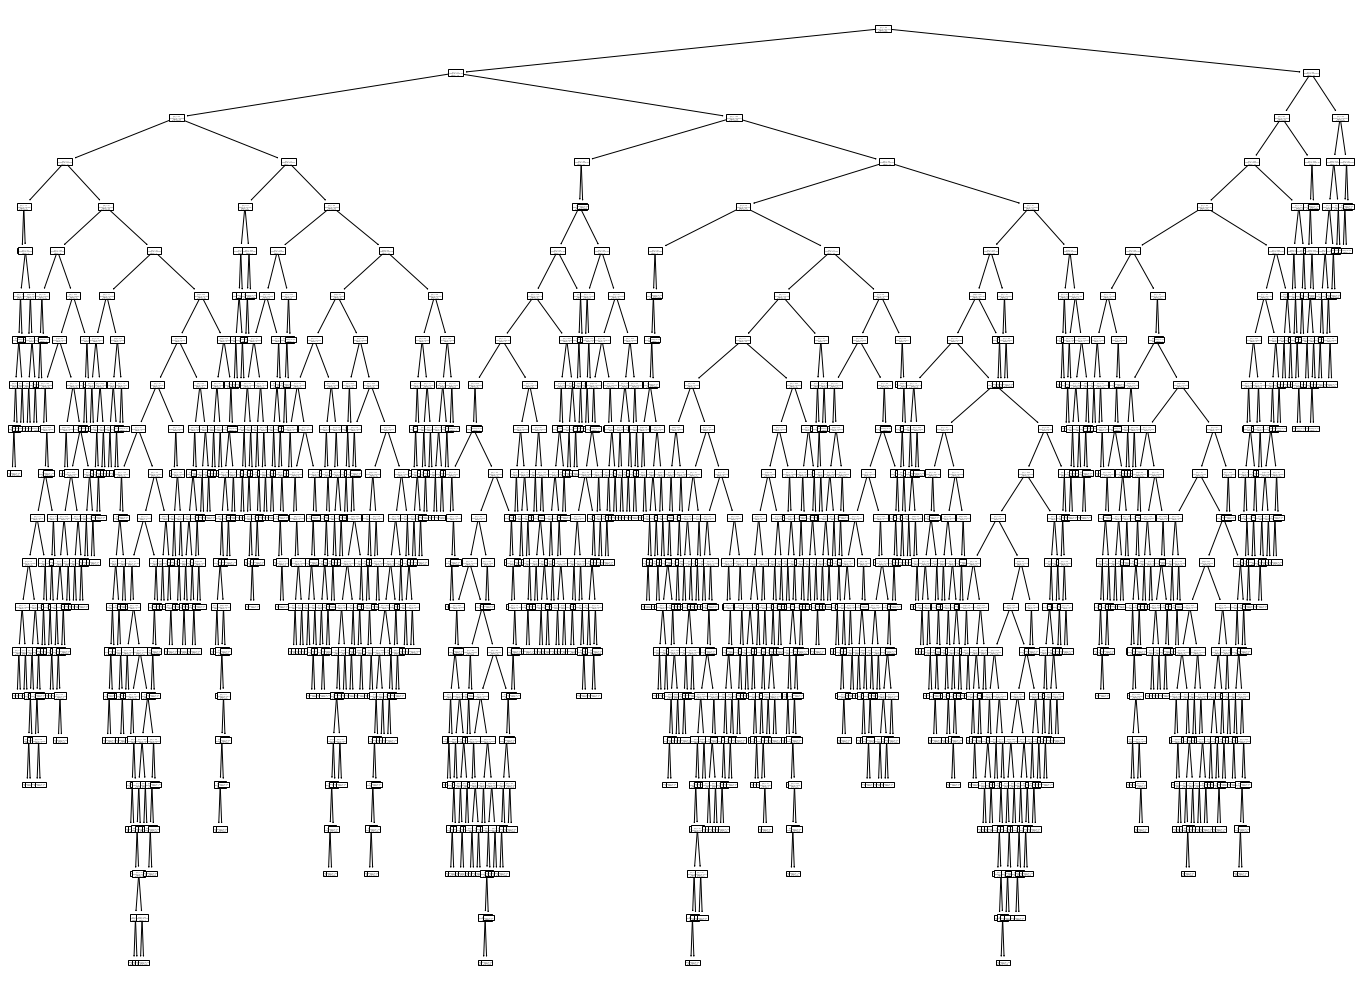

In [637]:
fit, ax=plt.subplots(figsize=(24,18))
ax=tree.plot_tree(model_tree)
plt.show()

# Feature importance- sprawdzamy ważność zmiennych niezależnych w modelu

In [610]:
for importance, name in sorted(zip(model_tree.feature_importances_, X_train.columns), reverse=True):
  print(name, importance)

ram(GB) 0.6102138655192928
weight(kg) 0.1004943237982413
cpu_freq(GHz) 0.07164053229863084
cpu_id 0.04250143776204653
screenresolution_id 0.02872347810767036
product_id 0.027919409820696156
memory_id 0.02556328865910796
gpu_id 0.02527631567541398
typename_id 0.022518810582829264
company_id 0.017039171406132085
inches 0.013273588616276422
opsys_id 0.006884846198622339
gpu_brand_id 0.006590907372745625
cpu_brand_id 0.0013600241822944936


In [612]:
feat_dict={}
for importance, name in sorted(zip(model_tree.feature_importances_, X_train.columns), reverse=True):
  feat_dict[name]=importance

In [615]:
feat_dict

{'ram(GB)': 0.6102138655192928,
 'weight(kg)': 0.1004943237982413,
 'cpu_freq(GHz)': 0.07164053229863084,
 'cpu_id': 0.04250143776204653,
 'screenresolution_id': 0.02872347810767036,
 'product_id': 0.027919409820696156,
 'memory_id': 0.02556328865910796,
 'gpu_id': 0.02527631567541398,
 'typename_id': 0.022518810582829264,
 'company_id': 0.017039171406132085,
 'inches': 0.013273588616276422,
 'opsys_id': 0.006884846198622339,
 'gpu_brand_id': 0.006590907372745625,
 'cpu_brand_id': 0.0013600241822944936}

In [617]:
feat_df=pd.DataFrame({'Feature':feat_dict.keys(), 'Importance':feat_dict.values()})

In [624]:
feat_df

,Feature,Importance
0,ram(GB),0.610214
1,weight(kg),0.100494
2,cpu_freq(GHz),0.071641
3,cpu_id,0.042501
4,screenresolution_id,0.028723
5,product_id,0.027919
6,memory_id,0.025563
7,gpu_id,0.025276
8,typename_id,0.022519
9,company_id,0.017039
